IMDB 리뷰 분류 문제

원래 신경망 모형

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import imdb
from tensorflow.keras import layers

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history = model.fit(train_data, train_labels,
                    epochs=20,batch_size=512,validation_split=0.4)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

Epoch 1/20
30/30 [==============================] - 4s 29ms/step - loss: 0.5001 - accuracy: 0.7919 - val_loss: 0.3658 - val_accuracy: 0.8740
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2937 - accuracy: 0.9057 - val_loss: 0.3179 - val_accuracy: 0.8734
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2208 - accuracy: 0.9265 - val_loss: 0.2935 - val_accuracy: 0.8855
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1710 - accuracy: 0.9443 - val_loss: 0.2827 - val_accuracy: 0.8880
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1404 - accuracy: 0.9533 - val_loss: 0.3402 - val_accuracy: 0.8694
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1166 - accuracy: 0.9636 - val_loss: 0.3316 - val_accuracy: 0.8771
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1002 - accuracy: 0.9693 - val_loss: 0.3291 - val_accuracy: 0.8799
Epoch 8/20
30

축소된 신경망 모형

In [ ]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history_smaller = model.fit(train_data, train_labels,
                    epochs=20,batch_size=512,validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 1s 26ms/step - loss: 0.6357 - accuracy: 0.7417 - val_loss: 0.5716 - val_accuracy: 0.8250
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.5120 - accuracy: 0.8652 - val_loss: 0.4748 - val_accuracy: 0.8530
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.4148 - accuracy: 0.8897 - val_loss: 0.4024 - val_accuracy: 0.8679
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3424 - accuracy: 0.9013 - val_loss: 0.3521 - val_accuracy: 0.8787
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2878 - accuracy: 0.9115 - val_loss: 0.3149 - val_accuracy: 0.8838
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2441 - accuracy: 0.9257 - val_loss: 0.2922 - val_accuracy: 0.8878
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2113 - accuracy: 0.9343 - val_loss: 0.2797 - val_accuracy: 0.8892
Epoch 8/20
30

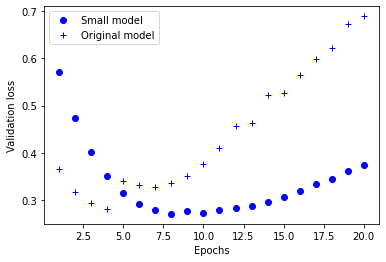

In [ ]:
history_dict = history.history
history_dict_smaller = history_smaller.history

import matplotlib.pyplot as plt

val_loss_values_smaller = history_dict_smaller["val_loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(val_loss_values) + 1)
plt.plot(epochs, val_loss_values_smaller, "bo", label="Small model")
plt.plot(epochs, val_loss_values, "b+", label="Original model")
plt.xlabel("Epochs")
plt.ylabel("Validation loss")
plt.legend()
plt.show()

큰 신경망 모형

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history_bigger = model.fit(train_data, train_labels,
                    epochs=20,batch_size=512,validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 1s 32ms/step - loss: 0.5620 - accuracy: 0.7571 - val_loss: 0.3097 - val_accuracy: 0.8855
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2529 - accuracy: 0.9045 - val_loss: 0.5747 - val_accuracy: 0.7677
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1650 - accuracy: 0.9361 - val_loss: 0.2845 - val_accuracy: 0.8922
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0974 - accuracy: 0.9695 - val_loss: 0.3498 - val_accuracy: 0.8889
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0951 - accuracy: 0.9765 - val_loss: 0.3256 - val_accuracy: 0.8857
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0061 - accuracy: 0.9994 - val_loss: 0.5058 - val_accuracy: 0.8865
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 8.9493e-04 - accuracy: 0.9999 - val_loss: 0.6003 - val_accuracy: 0.8871
Epoch 8/2

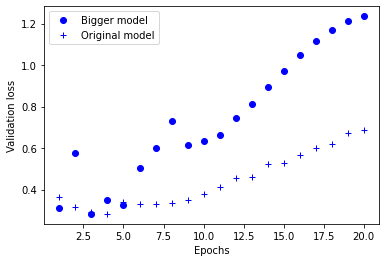

In [ ]:
history_dict_bigger = history_bigger.history

val_loss_values_bigger = history_dict_bigger["val_loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(val_loss_values) + 1)
plt.plot(epochs, val_loss_values_bigger, "bo", label="Bigger model")
plt.plot(epochs, val_loss_values, "b+", label="Original model")
plt.xlabel("Epochs")
plt.ylabel("Validation loss")
plt.legend()
plt.show()

가중치 규제 추가

- L2 규제 추가

In [ ]:
from tensorflow.keras import regularizers

model = keras.Sequential([
    layers.Dense(16, kernel_regularizer = regularizers.l2(0.002), 
                 activation="relu"),
    layers.Dense(16, kernel_regularizer = regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history_l2_reg = model.fit(train_data, train_labels,
                    epochs=20,batch_size=512,validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 1s 27ms/step - loss: 0.6040 - accuracy: 0.7775 - val_loss: 0.4785 - val_accuracy: 0.8604
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.4121 - accuracy: 0.8927 - val_loss: 0.3961 - val_accuracy: 0.8847
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3396 - accuracy: 0.9140 - val_loss: 0.3711 - val_accuracy: 0.8884
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3062 - accuracy: 0.9219 - val_loss: 0.3641 - val_accuracy: 0.8875
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2853 - accuracy: 0.9297 - val_loss: 0.3675 - val_accuracy: 0.8819
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2739 - accuracy: 0.9344 - val_loss: 0.3698 - val_accuracy: 0.8838
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2611 - accuracy: 0.9393 - val_loss: 0.3634 - val_accuracy: 0.8852
Epoch 8/20
30

- L1 규제 추가

In [ ]:
model = keras.Sequential([
    layers.Dense(16, kernel_regularizer = regularizers.l1(0.001), 
                 activation="relu"),
    layers.Dense(16, kernel_regularizer = regularizers.l1(0.001),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history_l1_reg = model.fit(train_data, train_labels,
                    epochs=20,batch_size=512,validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 1s 27ms/step - loss: 1.0658 - accuracy: 0.7593 - val_loss: 0.7085 - val_accuracy: 0.8245
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.6649 - accuracy: 0.8367 - val_loss: 0.6655 - val_accuracy: 0.8267
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.6124 - accuracy: 0.8547 - val_loss: 0.6147 - val_accuracy: 0.8445
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.5873 - accuracy: 0.8553 - val_loss: 0.5800 - val_accuracy: 0.8613
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.5633 - accuracy: 0.8645 - val_loss: 0.5636 - val_accuracy: 0.8614
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.5533 - accuracy: 0.8638 - val_loss: 0.5674 - val_accuracy: 0.8577
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.5464 - accuracy: 0.8669 - val_loss: 0.5551 - val_accuracy: 0.8613
Epoch 8/20
30

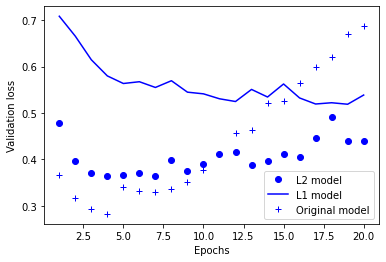

In [ ]:
history_dict_l2_reg = history_l2_reg.history
history_dict_l1_reg = history_l1_reg.history

val_loss_values_l2 = history_dict_l2_reg["val_loss"]
val_loss_values_l1 = history_dict_l1_reg["val_loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(val_loss_values) + 1)
plt.plot(epochs, val_loss_values_l2, "bo", label="L2 model")
plt.plot(epochs, val_loss_values_l1, "b-", label="L1 model")
plt.plot(epochs, val_loss_values, "b+", label="Original model")
plt.xlabel("Epochs")
plt.ylabel("Validation loss")
plt.legend()
plt.show()

In [ ]:
model = keras.Sequential([
    layers.Dense(16, kernel_regularizer = regularizers.l1_l2(l1=0.001,l2=0.002), 
                 activation="relu"),
    layers.Dense(16, kernel_regularizer = regularizers.l1_l2(l1=0.001,l2=0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history_reg = model.fit(train_data, train_labels,
                    epochs=20,batch_size=512,validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 1s 28ms/step - loss: 1.1246 - accuracy: 0.7120 - val_loss: 0.7455 - val_accuracy: 0.8167
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.6930 - accuracy: 0.8345 - val_loss: 0.6648 - val_accuracy: 0.8537
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.6410 - accuracy: 0.8501 - val_loss: 0.6341 - val_accuracy: 0.8502
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.6066 - accuracy: 0.8601 - val_loss: 0.6948 - val_accuracy: 0.7893
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.5889 - accuracy: 0.8634 - val_loss: 0.6004 - val_accuracy: 0.8586
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.5761 - accuracy: 0.8655 - val_loss: 0.5993 - val_accuracy: 0.8496
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.5593 - accuracy: 0.8733 - val_loss: 0.6031 - val_accuracy: 0.8430
Epoch 8/20
30

드롭아웃 추가

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history_dropout = model.fit(train_data, train_labels,
                    epochs=20,batch_size=512,validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 1s 27ms/step - loss: 0.6597 - accuracy: 0.6100 - val_loss: 0.6114 - val_accuracy: 0.7364
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.5842 - accuracy: 0.7640 - val_loss: 0.5331 - val_accuracy: 0.8064
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.5165 - accuracy: 0.8238 - val_loss: 0.4802 - val_accuracy: 0.8201
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.4617 - accuracy: 0.8565 - val_loss: 0.4309 - val_accuracy: 0.8784
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.4132 - accuracy: 0.8742 - val_loss: 0.3851 - val_accuracy: 0.8834
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3718 - accuracy: 0.8907 - val_loss: 0.3661 - val_accuracy: 0.8813
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3345 - accuracy: 0.9059 - val_loss: 0.3441 - val_accuracy: 0.8840
Epoch 8/20
30

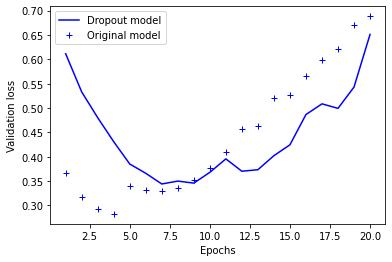

In [ ]:
history_dict_dropout = history_dropout.history

val_loss_values_dropout = history_dict_dropout["val_loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(val_loss_values) + 1)
plt.plot(epochs, val_loss_values_dropout, "b-", label="Dropout model")
plt.plot(epochs, val_loss_values, "b+", label="Original model")
plt.xlabel("Epochs")
plt.ylabel("Validation loss")
plt.legend()
plt.show()

**실습** 

뉴스 기사 주제 분류

- Reuters 데이터
- 46개 주제 분류
- Single-label, multiclass classification

In [1]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


- IMDB와 마찬가지로 가장 빈번히 등장하는 10,000개의 단어만 활용 (num_words = 10000)

In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [4]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [5]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

565248/550378 [==============================] - 0s 0us/step


In [6]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

- 뉴스기사 topic은 0~45의 값중 하나를 가짐

In [7]:
train_labels[0]

3

- 뉴스기사에 포함된 단어를 벡터화

In [8]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
    
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

- 뉴스기사 topic은 one-hot encoding

In [ ]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
    
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

- 텐서플로에 구현된 One-hot encoding 방안

In [9]:
from tensorflow.keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [10]:
one_hot_train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

신경망 모형 생성

- 출력이 2개가 아니라 46개로 나와야 함

In [11]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

- 손실함수 Loss function : categorical_crossentropy

In [12]:
 model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

- 검증 데이터 집합 생성

In [13]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

- 학습: 20회 반복(epochs)

In [14]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 4s 43ms/step - loss: 2.5825 - accuracy: 0.5226 - val_loss: 1.7415 - val_accuracy: 0.6320
Epoch 2/20
16/16 [==============================] - 0s 17ms/step - loss: 1.4311 - accuracy: 0.7005 - val_loss: 1.3149 - val_accuracy: 0.7180
Epoch 3/20
16/16 [==============================] - 0s 18ms/step - loss: 1.0529 - accuracy: 0.7793 - val_loss: 1.1288 - val_accuracy: 0.7610
Epoch 4/20
16/16 [==============================] - 0s 21ms/step - loss: 0.8288 - accuracy: 0.8232 - val_loss: 1.0274 - val_accuracy: 0.7890
Epoch 5/20
16/16 [==============================] - 0s 17ms/step - loss: 0.6556 - accuracy: 0.8627 - val_loss: 0.9564 - val_accuracy: 0.7950
Epoch 6/20
16/16 [==============================] - 0s 18ms/step - loss: 0.5237 - accuracy: 0.8913 - val_loss: 0.9341 - val_accuracy: 0.8050
Epoch 7/20
16/16 [==============================] - 0s 17ms/step - loss: 0.4211 - accuracy: 0.9134 - val_loss: 0.8976 - val_accuracy: 0.8110
Epoch 8/20
16

- 손실 값 시각화

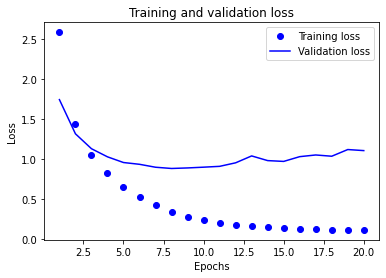

In [15]:
import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

- 정확도 시각화

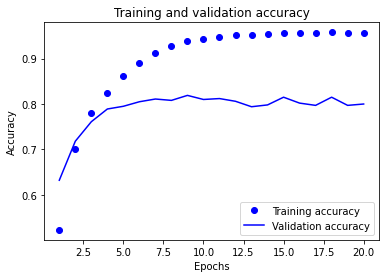

In [16]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

- 과적합이 시작되는 부분까지만 반복 수행
- 여기서는 9회 반복을 선택

In [17]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 32ms/step - loss: 2.6844 - accuracy: 0.5306 - val_loss: 1.7814 - val_accuracy: 0.6480
Epoch 2/9
16/16 [==============================] - 0s 18ms/step - loss: 1.4677 - accuracy: 0.7005 - val_loss: 1.3508 - val_accuracy: 0.7120
Epoch 3/9
16/16 [==============================] - 0s 17ms/step - loss: 1.1047 - accuracy: 0.7660 - val_loss: 1.1844 - val_accuracy: 0.7330
Epoch 4/9
16/16 [==============================] - 0s 20ms/step - loss: 0.8842 - accuracy: 0.8099 - val_loss: 1.0848 - val_accuracy: 0.7620
Epoch 5/9
16/16 [==============================] - 0s 20ms/step - loss: 0.7095 - accuracy: 0.8507 - val_loss: 1.0000 - val_accuracy: 0.7830
Epoch 6/9
16/16 [==============================] - 0s 17ms/step - loss: 0.5689 - accuracy: 0.8826 - val_loss: 0.9569 - val_accuracy: 0.8110
Epoch 7/9
16/16 [==============================] - 0s 17ms/step - loss: 0.4569 - accuracy: 0.9055 - val_loss: 0.9246 - val_accuracy: 0.8150
Epoch 8/9
16/16 [===

- Results  (Loss, Accuracy)

In [18]:
results

[0.976617693901062, 0.7885128855705261]

- 테스트 집합에 대한 예측

In [19]:
predictions = model.predict(x_test)

In [20]:
predictions[0].shape

(46,)

In [21]:
np.sum(predictions[0])

0.99999976

In [22]:
np.argmax(predictions[0])

3

- 레이블과 손실함수의 다른 예
- one hot encoding이 아니고 클래스(카테고리)값을 갖는 경우
- 이 때에는 loss function을 sparse_categorical_crossentropy로 설정

In [23]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [24]:
y_train[0]

3

In [25]:
 model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

- 중간층의 노드 수를 충분히 큰 수로해야 학습이 잘 이루어짐
- 아래와 같이 중간층 노드의 수를 4로 설정한 경우

In [26]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 11ms/step - loss: 3.3481 - accuracy: 0.0713 - val_loss: 2.8413 - val_accuracy: 0.1380
Epoch 2/20
63/63 [==============================] - 1s 8ms/step - loss: 2.1232 - accuracy: 0.5644 - val_loss: 1.6939 - val_accuracy: 0.6660
Epoch 3/20
63/63 [==============================] - 0s 7ms/step - loss: 1.3378 - accuracy: 0.7120 - val_loss: 1.4202 - val_accuracy: 0.6800
Epoch 4/20
63/63 [==============================] - 0s 7ms/step - loss: 1.1285 - accuracy: 0.7330 - val_loss: 1.3406 - val_accuracy: 0.6910
Epoch 5/20
63/63 [==============================] - 0s 7ms/step - loss: 1.0046 - accuracy: 0.7493 - val_loss: 1.3011 - val_accuracy: 0.6870
Epoch 6/20
63/63 [==============================] - 0s 8ms/step - loss: 0.9099 - accuracy: 0.7674 - val_loss: 1.3096 - val_accuracy: 0.7010
Epoch 7/20
63/63 [==============================] - 0s 8ms/step - loss: 0.8352 - accuracy: 0.7836 - val_loss: 1.3254 - val_accuracy: 0.7070
Epoch 8/20
63/63 [=

**실습** 

보스톤 주택 가격 예측

- 수치 예측 문제 (Regression, 회귀)

In [27]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


In [28]:
train_data.shape

(404, 13)

In [29]:
test_data.shape

(102, 13)

In [30]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

- 변수 표준화(Normalizing)
- (x - mean)/standard deviation
- 평균이 0이고, 표준편차 1인 분포로 변경 

In [31]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

모델 생성

In [32]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

k겹 교차 검증 k fold cross validation 

In [33]:
k= 4
num_val_samples = len(train_data) // k 
num_epochs = 100
all_scores = []

for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0) #Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [ ]:
all_scores

[2.1873981952667236, 2.7515006065368652, 2.571168899536133, 2.734755754470825]

In [ ]:
np.mean(all_scores)

2.5612058639526367

- 반복만 100 -> 500으로 변화

In [ ]:
num_epochs = 500
all_mae_histories = []

for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


epoch 별 MAE 히스토리

In [ ]:
 average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

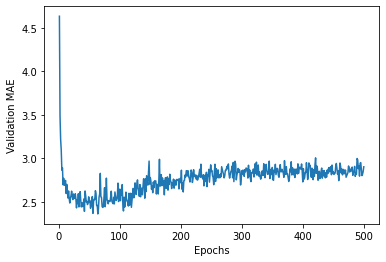

In [ ]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

- 첫 10개 데이터 제외
- exponential moving average 

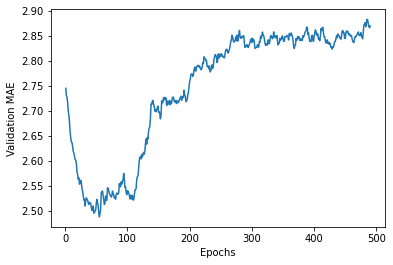

In [ ]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
    
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

- 최종 모형 학습

In [ ]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=80, batch_size=1, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 3ms/step - loss: 15.7491 - mae: 2.6200


In [ ]:
test_mae_score

2.619960069656372

- 예측치 생성

In [ ]:
predictions = model.predict(test_data)
predictions[0]

array([8.486709], dtype=float32)

In [ ]:
test_targets[0]

7.2